In [1]:
%pip install tensorflow-cpu

     -------------------------------------- 262.7/262.7 MB 6.4 MB/s eta 0:00:00
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
     ---------------------------------------- 5.9/5.9 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.10.0 which is incompatible.
tensorflow 2.8.0 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.10.1 which is incompatible.
tensorflow-gpu 2.8.0 requires keras<2.9,>=2.8.0rc0, but you have keras 2.10.0 which is incompatible.
tensorflow-gpu 2.8.0 requires tensorboard<2.9,>=2.8, but you have tensorboard 2.10.1 which is incompatible.


In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [4]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'c:\\Users\\user\\.conda\\envs\\han\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
from keras.datasets.mnist import load_data
load_data

<function keras.datasets.mnist.load_data(path='mnist.npz')>

In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
x_train.min(), x_train.max(), x_train.shape

(0.0, 1.0, (60000, 28, 28))

In [9]:
y_train.min(), y_train.max(), y_train.shape

(0, 9, (60000,))

In [10]:
x_test.min(), x_test.max(), x_test.shape

(0.0, 1.0, (10000, 28, 28))

In [11]:
y_test.min(), y_test.max(), y_test.shape

(0, 9, (10000,))

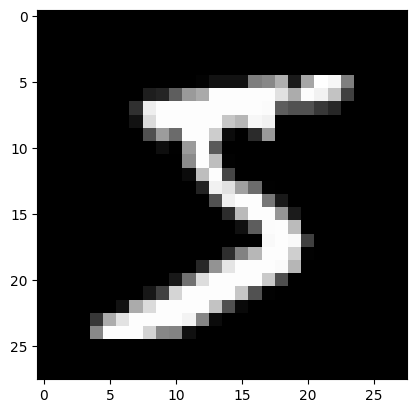

In [13]:
plt.imshow(x_train[0], cmap='gray')

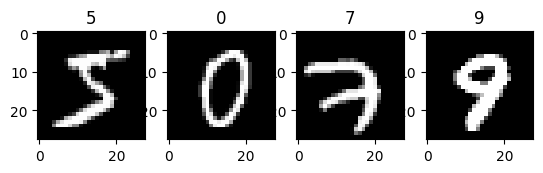

In [15]:
num = [0, 1000, 5000, 5999]

cnt = 0
for i in num:
    cnt = cnt + 1
    plt.subplot(1,len(num),cnt)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])

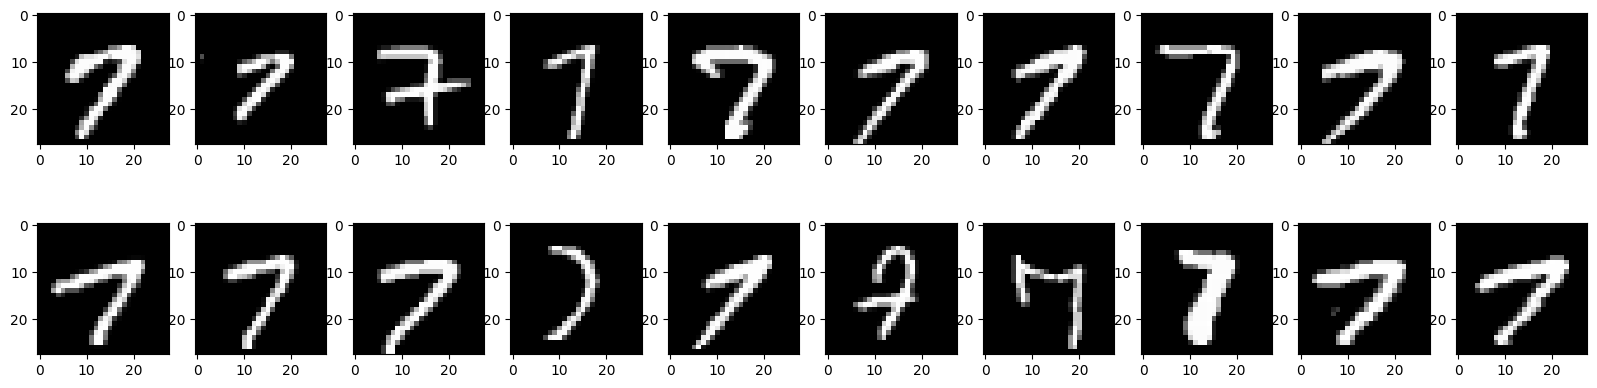

In [20]:
num = 7
xList = []
plt.figure(figsize=(20,5))
for x,y in zip(x_train, y_train):
    if y == num:
        xList.append(x)

showCount = 20
for x in range(showCount):
    plt.subplot(int(showCount/10),10,x+1)
    plt.imshow(xList[x], cmap='gray')

<BarContainer object of 10 artists>

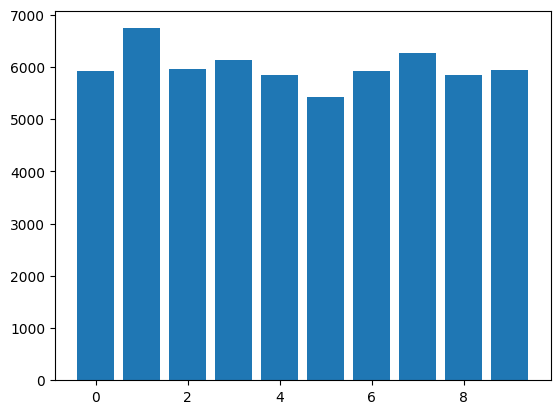

In [23]:
tmp = np.unique(y_train, return_counts=True)
plt.bar(tmp[0], tmp[1])

<BarContainer object of 10 artists>

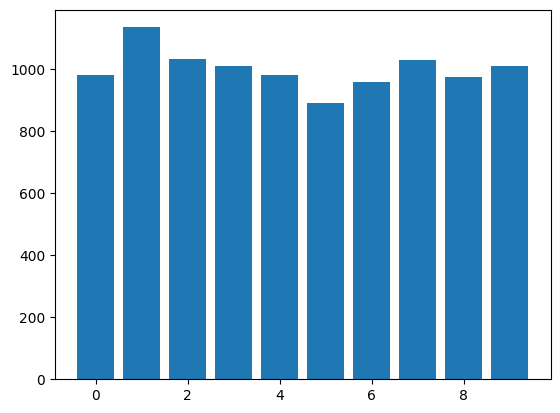

In [25]:
tmp = np.unique(y_test, return_counts=True)
plt.bar(tmp[0], tmp[1])

In [31]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 785       
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
 dense_3 (Dense)             (None, 10)                20        
                                                                 
Total params: 805
Trainable params: 805
Non-trainable params: 0
_________________________________________________________________


In [35]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
len(model.weights)

6

In [36]:
model.weights[1]

<tf.Variable 'dense_7/bias:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>

In [38]:
model.fit(x_train, y_train, 
        validation_data=(x_test,y_test),
        epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135


In [39]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
model.fit(x_train, y_train, 
        validation_data=(x_test,y_test),
        epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2946 - accuracy: 0.9139 - val_loss: 0.1352 - val_accuracy: 0.9600
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1443 - accuracy: 0.9568 - val_loss: 0.1037 - val_accuracy: 0.9680
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1072 - accuracy: 0.9670 - val_loss: 0.0784 - val_accuracy: 0.9758
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0877 - accuracy: 0.9724 - val_loss: 0.0757 - val_accuracy: 0.9774
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0754 - accuracy: 0.9760 - val_loss: 0.0730 - val_accuracy: 0.9782


In [41]:
model.save('myMnist.h5')

## 내가 쓴 손글씨

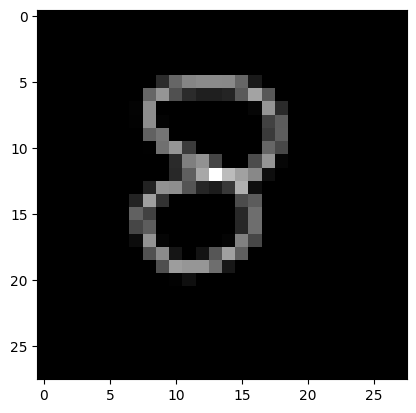

In [51]:
img = Image.open('./손글씨1.jpg').convert('L')
img = img.resize((28,28))
imgArr = 255 - np.array(img)
imgSc = imgArr / 255
plt.imshow(imgSc, cmap='gray')

In [52]:
pr = model.predict(imgSc.reshape(1,28,28))
pr

1/1 [==============================] - 0s 30ms/step


array([[0.02306378, 0.00823338, 0.11270075, 0.06248734, 0.2612067 ,
        0.10312838, 0.04784244, 0.16064808, 0.0906831 , 0.13000603]],
      dtype=float32)

In [53]:
np.argmax(pr)
# 상하좌우 여백에 딱 맞추고, 펜 두께도 맞춰야 잘 나옴

4